In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
big_folder = './MNIST records'
key = 'epoch_mean_test_loss'  # {'epoch_mean_train_loss', 'epoch_mean_test_loss', 'epoch_train_accuracy', 'epoch_test_accuracy'}
data_name = 'MNIST'  # used in the config, like usual
TestORTrain = 'Test'  # {'Test', 'Train'}
LossORAcc = 'Loss'  # {'Loss', 'Accuracy'}
maxORlast = 'last'  # {'max', 'min', 'last'}

gauss_vicinal_stds = [0.25, 0.5, 0.75]
alphas = [0.2, 0.5, 1.0, 4.0, 8.0]

In [2]:
def load_history(filename_dir):
    with open(filename_dir, 'r') as fp:
        history = json.load(fp)
    return history

In [3]:
def grab_finals(save_folder_dir, file_prefix, key, maxORlast):
    history_filenames = [x for x in os.listdir(save_folder_dir) if x.startswith(file_prefix) and x.endswith('.json')]
    finals = list()
    for name in history_filenames:
        history = load_history(save_folder_dir + '/' + name)
        if maxORlast == 'max':
            finals.append(max(history[key]))
        elif maxORlast == 'last':
            finals.append(history[key][-1])
        elif maxORlast == 'min':
            finals.append(min(history[key]))
    return finals

In [4]:
def plot_violin(violin_finals, title, figsize, title_fontsize, other_fontsize, xlabel, ylabel, xticks):
    plt.figure(figsize=figsize)
    plt.violinplot(violin_finals, showmeans=True)
    plt.xlabel(xlabel, fontsize=other_fontsize)
    plt.xticks(np.arange(len(xticks)) + 1, xticks, fontsize=other_fontsize)
    plt.ylabel(ylabel, fontsize=other_fontsize)
    plt.title(title, fontsize=title_fontsize)
    plt.grid()

In [5]:
def plot_line(violin_finals, title, figsize, title_fontsize, other_fontsize, xlabel, ylabel, xticks):
    plt.figure(figsize=figsize)
    plt.plot(np.arange(len(xticks)) + 1, violin_finals, 'bo-.')
    plt.xlabel(xlabel, fontsize=other_fontsize)
    plt.xticks(np.arange(len(xticks)) + 1, xticks, fontsize=other_fontsize)
    plt.ylabel(ylabel, fontsize=other_fontsize)
    plt.title(title, fontsize=title_fontsize)
    plt.grid()

# Standard

In [6]:
# Configuration #
config = {
    'validation_times': None,
    'data_name': data_name,  # {'breast_cancer', 'cifar10', 'MNIST', 'FashionMNIST', 'spambase', 'abalone', 'iris', 'wine'}
    'perturb_type': None,  # {None, 'mixup', 'mixup sc', 'mixup nb', 'gauss VRM'}
    'augWPL': None,  # {None, 0.25, 0.5, 0.75, 0.9, 0.99} or others
    'geometric_param': None,  # {0.25, 0.5, 0.75, 1.} or others
    'gauss_vicinal_std': None,  # {0.25, 0.5, 0.75, 1.} or others
    'batch_size': None,
    'step_size': None,  # {0.1, 0.01, 0.001, 0.0005} or others
    'epochs': None,
    'L2_decay': None,  # {0., 1e-4} or others
    'alpha': None,  # {0.25, 0.5, 0.75, 1.} or others
    'breast_spam_model': None  # {'complex_tanh_sigmoid', 'simple_relu_sigmoid', 'simple_relu_softmax'}; ONLY VALID for legacy 'breast_cancer' and 'spambase'
}
if config['data_name'] in ['breast_cancer', 'spambase']:
    if config['breast_spam_model'] in ['complex_tanh_sigmoid', 'simple_relu_sigmoid']:
        config['criterion_type'] = 'BCE'
    elif config['breast_spam_model'] in ['simple_relu_softmax']:
        config['criterion_type'] = 'CE'
elif config['data_name'] in  ['cifar10', 'MNIST', 'FashionMNIST', 'abalone', 'iris', 'wine']:
    config['criterion_type'] = 'CE'

# Folders and Files #
save_folder_dir = big_folder + '/{}-{}'.format(str(config['data_name']), str(config['perturb_type']))
file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))

In [7]:
standard_finals = grab_finals(save_folder_dir, file_prefix, key, maxORlast)

# Gauss VRM

In [8]:
# Configuration #
config = {
    'validation_times': None,
    'data_name': data_name,  # {'breast_cancer', 'cifar10', 'MNIST', 'FashionMNIST', 'spambase', 'abalone', 'iris', 'wine'}
    'perturb_type': 'gauss VRM',  # {None, 'mixup', 'mixup sc', 'mixup nb', 'gauss VRM'}
    'augWPL': None,  # {None, 0.25, 0.5, 0.75, 0.9, 0.99} or others
    'geometric_param': None,  # {0.25, 0.5, 0.75, 1.} or others
    'gauss_vicinal_std': None,  # {0.25, 0.5, 0.75, 1.} or others
    'batch_size': None,
    'step_size': None,  # {0.1, 0.01, 0.001, 0.0005} or others
    'epochs': None,
    'L2_decay': None,  # {0., 1e-4} or others
    'alpha': None,  # {0.25, 0.5, 0.75, 1.} or others
    'breast_spam_model': None  # {'complex_tanh_sigmoid', 'simple_relu_sigmoid', 'simple_relu_softmax'}; ONLY VALID for legacy 'breast_cancer' and 'spambase'
}
if config['data_name'] in ['breast_cancer', 'spambase']:
    if config['breast_spam_model'] in ['complex_tanh_sigmoid', 'simple_relu_sigmoid']:
        config['criterion_type'] = 'BCE'
    elif config['breast_spam_model'] in ['simple_relu_softmax']:
        config['criterion_type'] = 'CE'
elif config['data_name'] in  ['cifar10', 'MNIST', 'FashionMNIST', 'abalone', 'iris', 'wine']:
    config['criterion_type'] = 'CE'
    
# Folders and Files #
save_folder_dir = big_folder + '/{}-{}'.format(str(config['data_name']), str(config['perturb_type']))
file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))

In [9]:
title = '{} {} {}\nGauss VRM with different std'.format(data_name, TestORTrain, LossORAcc)
ylabel = '{} {}'.format(TestORTrain, LossORAcc)
xlabel = 'Methods'
xticks = ['standard'] + ['std {}'.format(std) for std in gauss_vicinal_stds]
title_fontsize = 17
other_fontsize = 14
figsize = (12, 7)

In [10]:
gauss_finals = list()
for gauss_vicinal_std in gauss_vicinal_stds:
    config['gauss_vicinal_std'] = gauss_vicinal_std
    file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))
    gauss_finals.append(grab_finals(save_folder_dir, file_prefix, key, maxORlast))

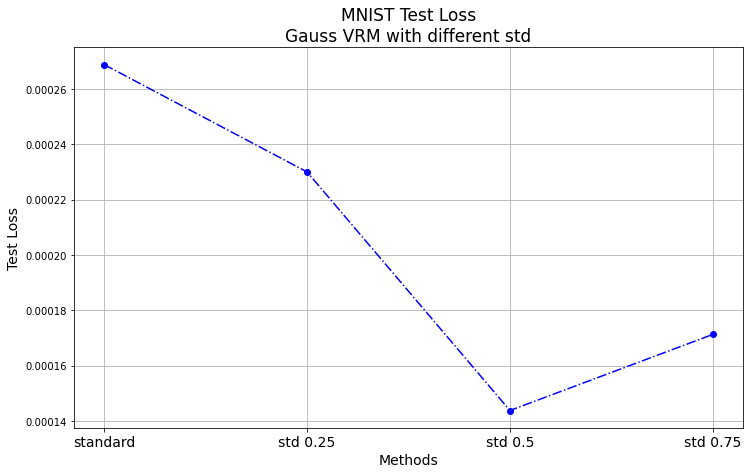

In [11]:
violin_finals = [standard_finals] + gauss_finals
plot_line(violin_finals, title, figsize, title_fontsize, other_fontsize, xlabel, ylabel, xticks)

# Mixup

In [12]:
# Configuration #
config = {
    'validation_times': None,
    'data_name': data_name,  # {'breast_cancer', 'cifar10', 'MNIST', 'FashionMNIST', 'spambase', 'abalone', 'iris', 'wine'}
    'perturb_type': 'mixup',  # {None, 'mixup', 'mixup sc', 'mixup nb', 'gauss VRM'}
    'augWPL': None,  # {None, 0.25, 0.5, 0.75, 0.9, 0.99} or others
    'geometric_param': None,  # {0.25, 0.5, 0.75, 1.} or others
    'gauss_vicinal_std': None,  # {0.25, 0.5, 0.75, 1.} or others
    'batch_size': None,
    'step_size': None,  # {0.1, 0.01, 0.001, 0.0005} or others
    'epochs': None,
    'L2_decay': None,  # {0., 1e-4} or others
    'alpha': None,  # {0.25, 0.5, 0.75, 1.} or others
    'breast_spam_model': None  # {'complex_tanh_sigmoid', 'simple_relu_sigmoid', 'simple_relu_softmax'}; ONLY VALID for legacy 'breast_cancer' and 'spambase'
}
if config['data_name'] in ['breast_cancer', 'spambase']:
    if config['breast_spam_model'] in ['complex_tanh_sigmoid', 'simple_relu_sigmoid']:
        config['criterion_type'] = 'BCE'
    elif config['breast_spam_model'] in ['simple_relu_softmax']:
        config['criterion_type'] = 'CE'
elif config['data_name'] in  ['cifar10', 'MNIST', 'FashionMNIST', 'abalone', 'iris', 'wine']:
    config['criterion_type'] = 'CE'
    
# Folders and Files #
save_folder_dir = big_folder + '/{}-{}'.format(str(config['data_name']), str(config['perturb_type']))
file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))

In [13]:
title = '{} {} {}\nMixUp with different alpha'.format(data_name, TestORTrain, LossORAcc)
ylabel = '{} {}'.format(TestORTrain, LossORAcc)
xlabel = 'Methods'
xticks = ['standard'] + ['alpha {}'.format(alpha) for alpha in alphas]
title_fontsize = 17
other_fontsize = 14
figsize = (12, 7)

In [14]:
mixup_finals = list()
for alpha in alphas:
    config['alpha'] = alpha
    file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))
    mixup_finals.append(grab_finals(save_folder_dir, file_prefix, key, maxORlast))

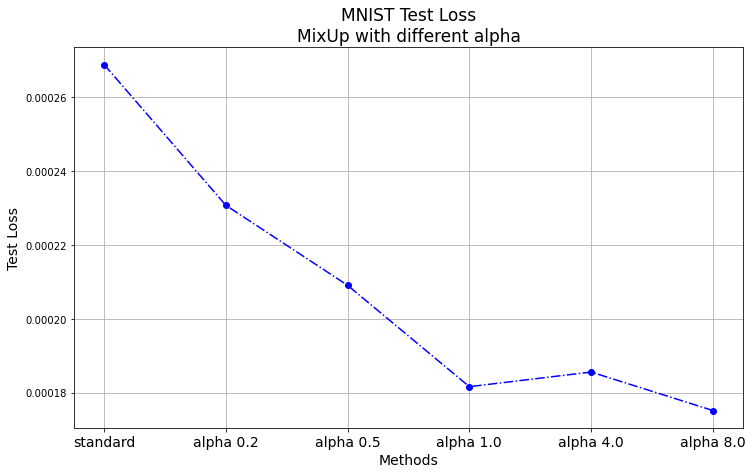

In [15]:
violin_finals = [standard_finals] + mixup_finals
plot_line(violin_finals, title, figsize, title_fontsize, other_fontsize, xlabel, ylabel, xticks)

# MixUp NB 0.5

In [16]:
# Configuration #
config = {
    'validation_times': None,
    'data_name': data_name,  # {'breast_cancer', 'cifar10', 'MNIST', 'FashionMNIST', 'spambase', 'abalone', 'iris', 'wine'}
    'perturb_type': 'mixup nb',  # {None, 'mixup', 'mixup sc', 'mixup nb', 'gauss VRM'}
    'augWPL': None,  # {None, 0.25, 0.5, 0.75, 0.9, 0.99} or others
    'geometric_param': 0.5,  # {0.25, 0.5, 0.75, 1.} or others
    'gauss_vicinal_std': None,  # {0.25, 0.5, 0.75, 1.} or others
    'batch_size': None,
    'step_size': None,  # {0.1, 0.01, 0.001, 0.0005} or others
    'epochs': None,
    'L2_decay': None,  # {0., 1e-4} or others
    'alpha': None,  # {0.25, 0.5, 0.75, 1.} or others
    'breast_spam_model': None  # {'complex_tanh_sigmoid', 'simple_relu_sigmoid', 'simple_relu_softmax'}; ONLY VALID for legacy 'breast_cancer' and 'spambase'
}
if config['data_name'] in ['breast_cancer', 'spambase']:
    if config['breast_spam_model'] in ['complex_tanh_sigmoid', 'simple_relu_sigmoid']:
        config['criterion_type'] = 'BCE'
    elif config['breast_spam_model'] in ['simple_relu_softmax']:
        config['criterion_type'] = 'CE'
elif config['data_name'] in  ['cifar10', 'MNIST', 'FashionMNIST', 'abalone', 'iris', 'wine']:
    config['criterion_type'] = 'CE'
    
# Folders and Files #
save_folder_dir = big_folder + '/{}-{}'.format(str(config['data_name']), str(config['perturb_type']))
file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))

In [17]:
title = '{} {} {}\nMixUp Neighbour Geometric {} with different alpha'.format(data_name, TestORTrain, LossORAcc, config['geometric_param'])
ylabel = '{} {}'.format(TestORTrain, LossORAcc)
xlabel = 'Methods'
xticks = ['standard'] + ['alpha {}'.format(alpha) for alpha in alphas]
title_fontsize = 17
other_fontsize = 14
figsize = (12, 7)

In [18]:
mixup_finals = list()
for alpha in alphas:
    config['alpha'] = alpha
    file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))
    mixup_finals.append(grab_finals(save_folder_dir, file_prefix, key, maxORlast))

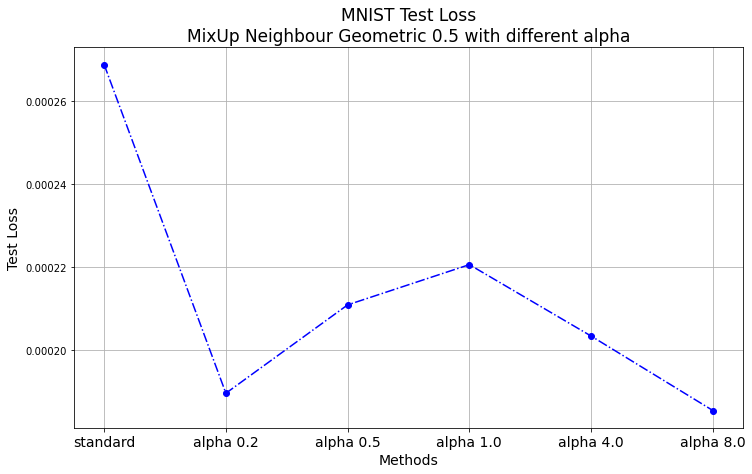

In [19]:
violin_finals = [standard_finals] + mixup_finals
plot_line(violin_finals, title, figsize, title_fontsize, other_fontsize, xlabel, ylabel, xticks)

# MixUp NB 0.75

In [20]:
# Configuration #
config = {
    'validation_times': None,
    'data_name': data_name,  # {'breast_cancer', 'cifar10', 'MNIST', 'FashionMNIST', 'spambase', 'abalone', 'iris', 'wine'}
    'perturb_type': 'mixup nb',  # {None, 'mixup', 'mixup sc', 'mixup nb', 'gauss VRM'}
    'augWPL': None,  # {None, 0.25, 0.5, 0.75, 0.9, 0.99} or others
    'geometric_param': 0.75,  # {0.25, 0.5, 0.75, 1.} or others
    'gauss_vicinal_std': None,  # {0.25, 0.5, 0.75, 1.} or others
    'batch_size': None,
    'step_size': None,  # {0.1, 0.01, 0.001, 0.0005} or others
    'epochs': None,
    'L2_decay': None,  # {0., 1e-4} or others
    'alpha': None,  # {0.25, 0.5, 0.75, 1.} or others
    'breast_spam_model': None  # {'complex_tanh_sigmoid', 'simple_relu_sigmoid', 'simple_relu_softmax'}; ONLY VALID for legacy 'breast_cancer' and 'spambase'
}
if config['data_name'] in ['breast_cancer', 'spambase']:
    if config['breast_spam_model'] in ['complex_tanh_sigmoid', 'simple_relu_sigmoid']:
        config['criterion_type'] = 'BCE'
    elif config['breast_spam_model'] in ['simple_relu_softmax']:
        config['criterion_type'] = 'CE'
elif config['data_name'] in  ['cifar10', 'MNIST', 'FashionMNIST', 'abalone', 'iris', 'wine']:
    config['criterion_type'] = 'CE'
    
# Folders and Files #
save_folder_dir = big_folder + '/{}-{}'.format(str(config['data_name']), str(config['perturb_type']))
file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))

In [21]:
title = '{} {} {}\nMixUp Neighbour Geometric {} with different alpha'.format(data_name, TestORTrain, LossORAcc, config['geometric_param'])
ylabel = '{} {}'.format(TestORTrain, LossORAcc)
xlabel = 'Methods'
xticks = ['standard'] + ['alpha {}'.format(alpha) for alpha in alphas]
title_fontsize = 17
other_fontsize = 14
figsize = (12, 7)

In [22]:
mixup_finals = list()
for alpha in alphas:
    config['alpha'] = alpha
    file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))
    mixup_finals.append(grab_finals(save_folder_dir, file_prefix, key, maxORlast))

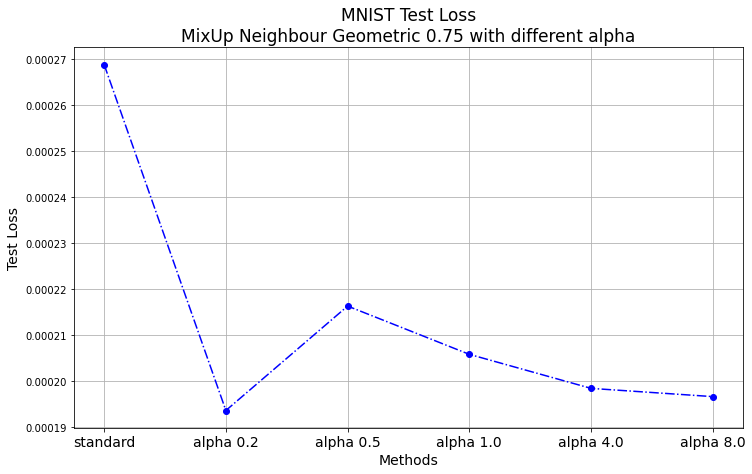

In [23]:
violin_finals = [standard_finals] + mixup_finals
plot_line(violin_finals, title, figsize, title_fontsize, other_fontsize, xlabel, ylabel, xticks)

# MixUp NB 1.0

In [24]:
# Configuration #
config = {
    'validation_times': None,
    'data_name': data_name,  # {'breast_cancer', 'cifar10', 'MNIST', 'FashionMNIST', 'spambase', 'abalone', 'iris', 'wine'}
    'perturb_type': 'mixup nb',  # {None, 'mixup', 'mixup sc', 'mixup nb', 'gauss VRM'}
    'augWPL': None,  # {None, 0.25, 0.5, 0.75, 0.9, 0.99} or others
    'geometric_param': 1.0,  # {0.25, 0.5, 0.75, 1.} or others
    'gauss_vicinal_std': None,  # {0.25, 0.5, 0.75, 1.} or others
    'batch_size': None,
    'step_size': None,  # {0.1, 0.01, 0.001, 0.0005} or others
    'epochs': None,
    'L2_decay': None,  # {0., 1e-4} or others
    'alpha': None,  # {0.25, 0.5, 0.75, 1.} or others
    'breast_spam_model': None  # {'complex_tanh_sigmoid', 'simple_relu_sigmoid', 'simple_relu_softmax'}; ONLY VALID for legacy 'breast_cancer' and 'spambase'
}
if config['data_name'] in ['breast_cancer', 'spambase']:
    if config['breast_spam_model'] in ['complex_tanh_sigmoid', 'simple_relu_sigmoid']:
        config['criterion_type'] = 'BCE'
    elif config['breast_spam_model'] in ['simple_relu_softmax']:
        config['criterion_type'] = 'CE'
elif config['data_name'] in  ['cifar10', 'MNIST', 'FashionMNIST', 'abalone', 'iris', 'wine']:
    config['criterion_type'] = 'CE'
    
# Folders and Files #
save_folder_dir = big_folder + '/{}-{}'.format(str(config['data_name']), str(config['perturb_type']))
file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))

In [25]:
title = '{} {} {}\nMixUp Neighbour Geometric {} with different alpha'.format(data_name, TestORTrain, LossORAcc, config['geometric_param'])
ylabel = '{} {}'.format(TestORTrain, LossORAcc)
xlabel = 'Methods'
xticks = ['standard'] + ['alpha {}'.format(alpha) for alpha in alphas]
title_fontsize = 17
other_fontsize = 14
figsize = (12, 7)

In [26]:
mixup_finals = list()
for alpha in alphas:
    config['alpha'] = alpha
    file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))
    mixup_finals.append(grab_finals(save_folder_dir, file_prefix, key, maxORlast))

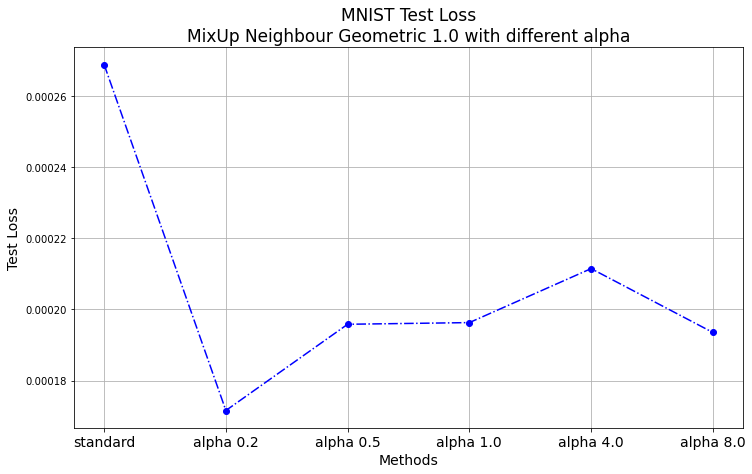

In [27]:
violin_finals = [standard_finals] + mixup_finals
plot_line(violin_finals, title, figsize, title_fontsize, other_fontsize, xlabel, ylabel, xticks)

# MixUp SC

In [28]:
# Configuration #
config = {
    'validation_times': None,
    'data_name': data_name,  # {'breast_cancer', 'cifar10', 'MNIST', 'FashionMNIST', 'spambase', 'abalone', 'iris', 'wine'}
    'perturb_type': 'mixup sc',  # {None, 'mixup', 'mixup sc', 'mixup nb', 'gauss VRM'}
    'augWPL': None,  # {None, 0.25, 0.5, 0.75, 0.9, 0.99} or others
    'geometric_param': None,  # {0.25, 0.5, 0.75, 1.} or others
    'gauss_vicinal_std': None,  # {0.25, 0.5, 0.75, 1.} or others
    'batch_size': None,
    'step_size': None,  # {0.1, 0.01, 0.001, 0.0005} or others
    'epochs': None,
    'L2_decay': None,  # {0., 1e-4} or others
    'alpha': None,  # {0.25, 0.5, 0.75, 1.} or others
    'breast_spam_model': None  # {'complex_tanh_sigmoid', 'simple_relu_sigmoid', 'simple_relu_softmax'}; ONLY VALID for legacy 'breast_cancer' and 'spambase'
}
if config['data_name'] in ['breast_cancer', 'spambase']:
    if config['breast_spam_model'] in ['complex_tanh_sigmoid', 'simple_relu_sigmoid']:
        config['criterion_type'] = 'BCE'
    elif config['breast_spam_model'] in ['simple_relu_softmax']:
        config['criterion_type'] = 'CE'
elif config['data_name'] in  ['cifar10', 'MNIST', 'FashionMNIST', 'abalone', 'iris', 'wine']:
    config['criterion_type'] = 'CE'
    
# Folders and Files #
save_folder_dir = big_folder + '/{}-{}'.format(str(config['data_name']), str(config['perturb_type']))
file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))

In [29]:
title = '{} {} {}\nMixUp Same Class with different alpha'.format(data_name, TestORTrain, LossORAcc)
ylabel = '{} {}'.format(TestORTrain, LossORAcc)
xlabel = 'Methods'
xticks = ['standard'] + ['alpha {}'.format(alpha) for alpha in alphas]
title_fontsize = 17
other_fontsize = 14
figsize = (12, 7)

In [30]:
mixup_finals = list()
for alpha in alphas:
    config['alpha'] = alpha
    file_prefix = '{}-{}-{}-{}-'.format(str(config['augWPL']), str(config['alpha']), str(config['geometric_param']), str(config['gauss_vicinal_std']))
    mixup_finals.append(grab_finals(save_folder_dir, file_prefix, key, maxORlast))

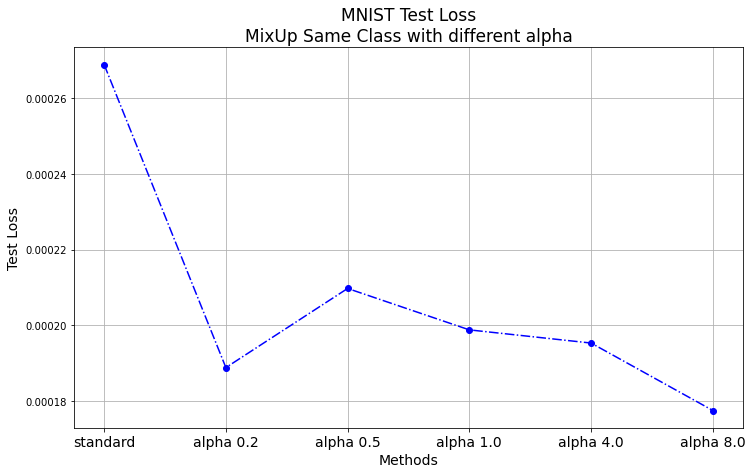

In [31]:
violin_finals = [standard_finals] + mixup_finals
plot_line(violin_finals, title, figsize, title_fontsize, other_fontsize, xlabel, ylabel, xticks)